In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

This datasets have multiple readings for the same timestamp values because k6 exports them in seconds.

In [193]:
df = pd.read_csv('datasets/063025-vus10-5min-t3.medium-batch-default.gz')

In [194]:
df_rd = df[df['metric_name'] == 'http_req_duration']

In [196]:
Q1 = df_rd['metric_value'].quantile(0.25)
Q3 = df_rd['metric_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_rd = df_rd[(df_rd['metric_value'] >= lower_bound) & (df_rd['metric_value'] <= upper_bound)]

In [209]:
df_rd['timestamp'] = pd.to_datetime(df_rd['timestamp'], unit='s')

In [210]:
df_rd_grouped = df_rd.groupby('timestamp').agg({'metric_value': 'mean'}).reset_index()

In [211]:
df_rd_grouped.head()

,timestamp,metric_value
0,2025-07-01 01:05:54,248.248701
1,2025-07-01 01:05:55,144.395666
2,2025-07-01 01:05:56,244.735563
3,2025-07-01 01:05:57,212.868938
4,2025-07-01 01:05:58,222.179843


In [181]:
df_rd_grouped = df_rd_grouped.dropna(subset=['metric_value'])

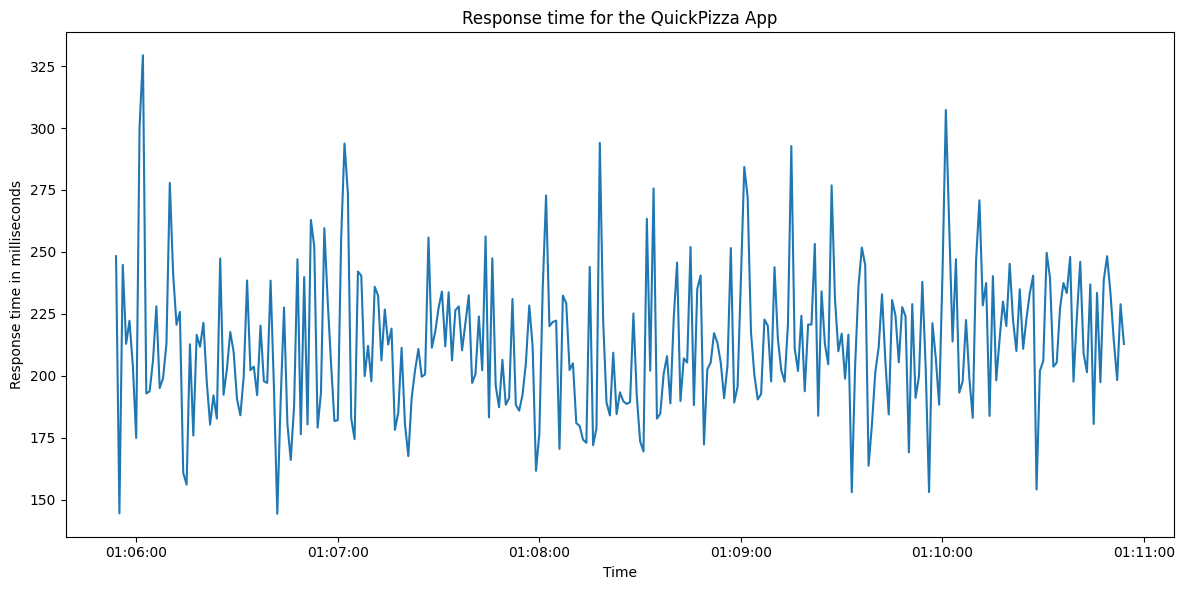

In [220]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_rd_grouped, x='timestamp', y='metric_value')

plt.title('Response time for the QuickPizza App')

plt.xlabel('Time')
plt.ylabel('Response time in milliseconds')

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.tight_layout()
plt.show()

## Analysis

The spikes in the graph could be due many different reasons. 

The batch processor exports traces at 200ms intervals by default, which would mean every 200ms the application and the processor "fight" for IO.

Both the custom collector and the default one present similar behaviour.

It could be worth it to try and bump the batch processor timeout.